## Tensorflow

In [ ]:
## Google tarafından geliştirilmiştir

## VERİNİN HAZIRLANMASI

In [1]:
import numpy as np
import pandas as pd

In [2]:
veriseti = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [3]:
veriseti

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [4]:
veriseti.isnull() # null değer yok

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,False
996,False,False,False
997,False,False,False
998,False,False,False


In [5]:
veriseti.head() # ilk 5 veriyi yazdırır , tail gibi

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


## Seaborn kütüphanesi, araştır!

## devam

In [6]:
import seaborn as sbn

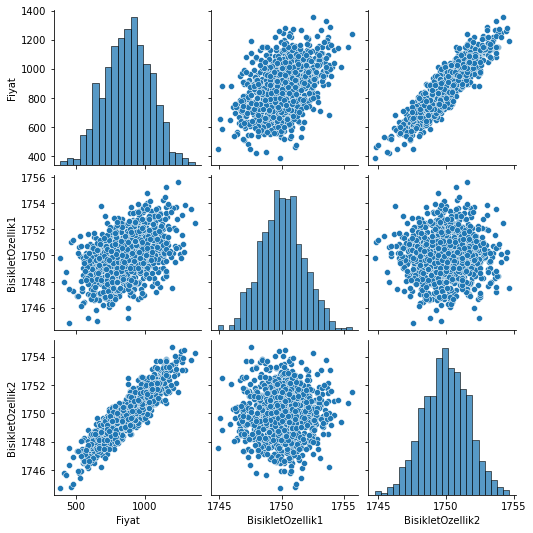

In [7]:
sbn.pairplot(veriseti)

## Veriyi train/test olarak bölmek

In [8]:
from sklearn.model_selection import train_test_split

# train_test_split SHİFT+TAB yaparak dokümantasyona bakılabilir

In [10]:
fiyat = veriseti.iloc[:,0:1].values
fiyat

array([[ 807.6738764],
       [ 959.2275201],
       [ 718.0200329],
       [ 945.6688847],
       [ 955.5429676],
       [ 950.2214253],
       [ 972.0999123],
       [ 730.7470179],
       [ 653.0064296],
       [1108.363012 ],
       [1092.432411 ],
       [ 831.9017301],
       [1050.644778 ],
       [ 932.4576656],
       [ 827.4618849],
       [ 886.0465092],
       [ 889.7252105],
       [1068.296866 ],
       [ 566.4010835],
       [ 780.8715318],
       [ 633.7147302],
       [ 758.4686205],
       [ 983.5045088],
       [1115.291836 ],
       [ 914.9140132],
       [ 822.1549425],
       [ 950.4423736],
       [ 989.5097974],
       [ 927.5574942],
       [1068.515289 ],
       [ 844.4737208],
       [ 573.2300709],
       [1014.528968 ],
       [ 784.7521757],
       [1100.709911 ],
       [ 939.3954013],
       [ 997.617767 ],
       [ 626.1947566],
       [1071.148623 ],
       [ 778.1894898],
       [1050.207614 ],
       [ 916.1829736],
       [ 897.6624037],
       [107

In [11]:
features = veriseti.iloc[:,1:].values ## .values diyerek numpy dizisine çevrilir
features

array([[1749.628226, 1749.590668],
       [1748.007826, 1751.824206],
       [1750.122967, 1747.977026],
       ...,
       [1752.540381, 1747.98331 ],
       [1751.34929 , 1747.484989],
       [1748.656426, 1752.539962]])

In [12]:
x_train,x_test,y_train,y_test = train_test_split(features,fiyat, test_size=0.33, random_state=15)

In [13]:
x_train

array([[1748.374239, 1751.217187],
       [1751.580415, 1753.658535],
       [1750.727042, 1745.942278],
       ...,
       [1747.497907, 1750.085896],
       [1753.042364, 1746.84704 ],
       [1749.557564, 1746.592948]])

In [14]:
x_train.shape

(670, 2)

## DATA SCALİNG 

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
ms = MinMaxScaler()


In [17]:
x_train = ms.fit_transform(x_train)
x_test = ms.fit_transform(x_test)

In [18]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

## Tensorflow import edilir

In [19]:
import tensorflow as tf
from tensorflow import keras

In [20]:
from tensorflow.keras.models import Sequential # modelin sınıfını oluşturur
from tensorflow.keras.layers import Dense

In [21]:
veriseti

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


## MODEL OLUŞTURULUR

In [22]:
model = Sequential() 
# model oluşturuldu

model.add(Dense(5, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(5, activation="relu")) 

## Burada 3 adet hidden layer bulunmakta ve her biri 5 adet nörondan oluşmaktadır
## Aktivasyon fonksiyonu ise relu olarak belirlenmiştir

model.add(Dense(1)) ## Bu ise output olarak belirlediğimiz nörondur


## Aşağıdaki satır için Tensorflow dokümantasyonuna göz at
model.compile(optimizer="rmsprop", loss= "mse")

## Loss function: maliyet fonksiyonu, bu karşılaştırmayı matematiksel olarak ifade eder


In [23]:
model.fit(x_train,y_train, epochs= 250)

Epoch 1/250
21/21 [==============================] - 0s 1ms/step - loss: 795637.0000
Epoch 2/250
21/21 [==============================] - 0s 1ms/step - loss: 795069.6875
Epoch 3/250
21/21 [==============================] - 0s 1ms/step - loss: 794606.6875
Epoch 4/250
21/21 [==============================] - 0s 1ms/step - loss: 794113.3125
Epoch 5/250
21/21 [==============================] - 0s 1ms/step - loss: 793596.3750
Epoch 6/250
21/21 [==============================] - 0s 1ms/step - loss: 793035.6875
Epoch 7/250
21/21 [==============================] - 0s 1ms/step - loss: 792425.1250
Epoch 8/250
21/21 [==============================] - 0s 1ms/step - loss: 791749.0000
Epoch 9/250
21/21 [==============================] - 0s 1ms/step - loss: 791004.7500
Epoch 10/250
21/21 [==============================] - 0s 1ms/step - loss: 790182.1875
Epoch 11/250
21/21 [==============================] - 0s 1ms/step - loss: 789274.8125
Epoch 12/250
21/21 [==============================] - 0s 1ms/st

Epoch 96/250
21/21 [==============================] - 0s 1ms/step - loss: 38887.3477
Epoch 97/250
21/21 [==============================] - 0s 2ms/step - loss: 31254.6680
Epoch 98/250
21/21 [==============================] - 0s 1ms/step - loss: 24572.0352
Epoch 99/250
21/21 [==============================] - 0s 1ms/step - loss: 18959.9609
Epoch 100/250
21/21 [==============================] - 0s 1ms/step - loss: 14442.5557
Epoch 101/250
21/21 [==============================] - 0s 1ms/step - loss: 11124.0527
Epoch 102/250
21/21 [==============================] - 0s 1ms/step - loss: 8837.4502
Epoch 103/250
21/21 [==============================] - 0s 1ms/step - loss: 7595.8091
Epoch 104/250
21/21 [==============================] - 0s 1ms/step - loss: 7148.5181
Epoch 105/250
21/21 [==============================] - 0s 1ms/step - loss: 7007.7612
Epoch 106/250
21/21 [==============================] - 0s 1ms/step - loss: 6901.3394
Epoch 107/250
21/21 [==============================] - 0s 1ms/s

21/21 [==============================] - 0s 1ms/step - loss: 732.2543
Epoch 193/250
21/21 [==============================] - 0s 1ms/step - loss: 700.1134
Epoch 194/250
21/21 [==============================] - 0s 1ms/step - loss: 663.2939
Epoch 195/250
21/21 [==============================] - 0s 1ms/step - loss: 625.2766
Epoch 196/250
21/21 [==============================] - 0s 1ms/step - loss: 591.2023
Epoch 197/250
21/21 [==============================] - 0s 1ms/step - loss: 559.9900
Epoch 198/250
21/21 [==============================] - 0s 1ms/step - loss: 529.6993
Epoch 199/250
21/21 [==============================] - 0s 1ms/step - loss: 498.5298
Epoch 200/250
21/21 [==============================] - 0s 1ms/step - loss: 468.6771
Epoch 201/250
21/21 [==============================] - 0s 1ms/step - loss: 445.5070
Epoch 202/250
21/21 [==============================] - 0s 1ms/step - loss: 417.9399
Epoch 203/250
21/21 [==============================] - 0s 2ms/step - loss: 393.3103
Epoch 

In [24]:
model.history.history ## loss function değerlerini verir
## Bunu grafik hale getirmek işimizi kolaylaştırır

# type(model.history.history) , output: dict


{'loss': [795637.0,
  795069.6875,
  794606.6875,
  794113.3125,
  793596.375,
  793035.6875,
  792425.125,
  791749.0,
  791004.75,
  790182.1875,
  789274.8125,
  788281.8125,
  787198.5625,
  786009.375,
  784724.125,
  783328.5625,
  781815.5,
  780178.875,
  778425.625,
  776527.3125,
  774493.4375,
  772325.5625,
  769997.5625,
  767506.5,
  764856.125,
  762028.875,
  759032.0625,
  755861.9375,
  752485.4375,
  748919.8125,
  745164.5,
  741182.9375,
  736976.5625,
  732581.25,
  727959.8125,
  723086.4375,
  717970.125,
  712622.5,
  707022.8125,
  701158.0625,
  695016.0625,
  688617.125,
  681941.5,
  674987.25,
  667773.875,
  660250.9375,
  652466.4375,
  644388.75,
  636001.75,
  627294.9375,
  618315.1875,
  608967.75,
  599387.75,
  589499.625,
  579294.5,
  568805.1875,
  558008.1875,
  546869.1875,
  535478.6875,
  523755.84375,
  511758.71875,
  499470.34375,
  486967.84375,
  474127.71875,
  461028.4375,
  447663.75,
  434072.5,
  420197.59375,
  406209.71875,
  391

<AxesSubplot:>

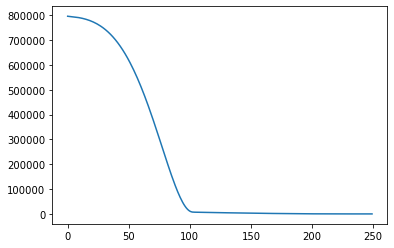

In [25]:
loss = model.history.history["loss"] # loss listesi alındı

sbn.lineplot(x= range(len(loss)), y= loss)

In [26]:
trainLoss = model.evaluate(x_train, y_train, verbose = 1) # verbose burada loss score'un yazılıp yazılmayacağını gösterir

21/21 [==============================] - 0s 1ms/step - loss: 74.6159


In [27]:
testLoss = model.evaluate(x_test, y_test, verbose = 0)

In [28]:
testLoss

4741.37060546875

In [29]:
y_test

array([[1081.652164 ],
       [ 622.6759897],
       [ 889.3568099],
       [ 902.8267326],
       [ 897.6624037],
       [ 452.6270656],
       [ 932.100396 ],
       [ 995.073078 ],
       [ 934.9101422],
       [1010.262616 ],
       [ 748.5472089],
       [ 915.2910235],
       [ 954.7741048],
       [1067.014716 ],
       [1108.539693 ],
       [ 680.3066064],
       [1130.95375  ],
       [ 660.7482456],
       [1151.00769  ],
       [ 896.6488749],
       [ 895.4654565],
       [ 724.2764591],
       [ 464.3079611],
       [ 612.0064901],
       [ 849.1433579],
       [1097.915483 ],
       [ 708.5805338],
       [ 765.0681455],
       [ 883.2143188],
       [ 777.0957125],
       [ 450.9959952],
       [ 790.6573017],
       [ 733.4466132],
       [ 652.3605123],
       [ 900.9986371],
       [ 838.3161182],
       [1035.131269 ],
       [1013.999754 ],
       [ 847.402171 ],
       [ 869.3197636],
       [ 759.4971728],
       [1182.580471 ],
       [1105.231214 ],
       [109

## Prediction

In [30]:
testTahminleri = model.predict(x_test)

In [31]:
testTahminleri

array([[1156.2703 ],
       [ 688.7495 ],
       [ 950.36163],
       [ 954.2696 ],
       [ 957.2613 ],
       [ 486.9882 ],
       [1001.86365],
       [1061.6742 ],
       [1025.7249 ],
       [1091.7856 ],
       [ 821.2471 ],
       [1000.23865],
       [1011.4816 ],
       [1134.5737 ],
       [1212.3824 ],
       [ 742.1352 ],
       [1195.8444 ],
       [ 699.3473 ],
       [1222.4683 ],
       [ 960.4787 ],
       [ 963.9431 ],
       [ 792.1823 ],
       [ 525.4959 ],
       [ 659.9303 ],
       [ 910.692  ],
       [1175.4238 ],
       [ 775.37134],
       [ 819.35583],
       [ 936.97253],
       [ 834.3876 ],
       [ 500.6178 ],
       [ 856.64954],
       [ 792.3289 ],
       [ 703.1515 ],
       [ 954.94574],
       [ 911.3921 ],
       [1114.9755 ],
       [1089.926  ],
       [ 918.5009 ],
       [ 928.0438 ],
       [ 825.5806 ],
       [1248.7377 ],
       [1176.4407 ],
       [1168.2744 ],
       [ 956.84625],
       [ 658.56055],
       [1211.4403 ],
       [1039.

In [32]:
tahminDf = pd.DataFrame(data = y_test, columns=["Gerçek Y"])

In [33]:
tahminDf

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [34]:
testTahminleri = pd.Series(testTahminleri.reshape(330,))

In [35]:
testTahminleri

0      1156.270264
1       688.749512
2       950.361633
3       954.269592
4       957.261292
          ...     
325    1092.592651
326     850.415588
327     838.235657
328    1253.075928
329     858.219666
Length: 330, dtype: float32

In [36]:
tahminDf = pd.concat([tahminDf, testTahminleri], axis= 1)

## İki df birleştirildi ve bir df daha oluşturuldu

In [37]:
tahminDf

,Gerçek Y,0
0,1081.652164,1156.270264
1,622.675990,688.749512
2,889.356810,950.361633
3,902.826733,954.269592
4,897.662404,957.261292
...,...,...
325,1028.438035,1092.592651
326,789.934950,850.415588
327,758.490486,838.235657
328,1172.871659,1253.075928


In [40]:
tahminDf.columns = ["Gerçek Y", "Tahmin Y"]

In [41]:
tahminDf

,Gerçek Y,Tahmin Y
0,1081.652164,1156.270264
1,622.675990,688.749512
2,889.356810,950.361633
3,902.826733,954.269592
4,897.662404,957.261292
...,...,...
325,1028.438035,1092.592651
326,789.934950,850.415588
327,758.490486,838.235657
328,1172.871659,1253.075928


<AxesSubplot:xlabel='Gerçek Y', ylabel='Tahmin Y'>

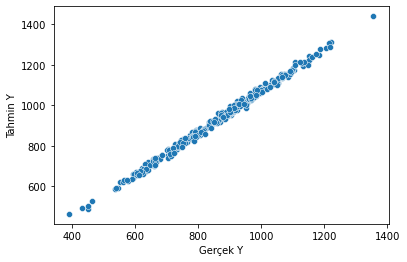

In [42]:
sbn.scatterplot(x="Gerçek Y",y = "Tahmin Y", data = tahminDf)

## Performantaki sapma için Absolute value kullanılabilir

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [50]:
mean_absolute_error(tahminDf["Gerçek Y"], tahminDf["Tahmin Y"]) # absolute error 
## 67'lik bir sapma gerçekleşebiir tahmin ve gerçek arasında

67.53195901348721

In [51]:
mean_squared_error(tahminDf["Gerçek Y"], tahminDf["Tahmin Y"]) # mse

4741.371015961038

In [49]:
veriseti.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


## MODELİ KAYDETMEK

In [53]:
from tensorflow.keras.models import load_model

In [54]:
model.save("bisiklet_modeli.h5")

In [55]:
model_callback = load_model("bisiklet_modeli.h5")

In [56]:
model_callback

In [59]:
## model_callback.predict() şeklinde kullanılabilir